# USA_Housing Dataset

## Import the Library

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# import dataset


In [3]:
USAHousing = pd.read_csv("USA_Housing.csv")
USAHousing.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


In [4]:
# To find the information of the dataset
USAHousing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


In [5]:
USAHousing.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price', 'Address'],
      dtype='object')

In [6]:
# Basic Stats
USAHousing.describe()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,68583.108984,5.977222,6.987792,3.981330,36163.516039,1.232073e+06
std,10657.991214,0.991456,1.005833,1.234137,9925.650114,3.531176e+05
min,17796.631190,2.644304,3.236194,2.000000,172.610686,1.593866e+04
25%,61480.562388,5.322283,6.299250,3.140000,29403.928702,9.975771e+05
50%,68804.286404,5.970429,7.002902,4.050000,36199.406689,1.232669e+06
75%,75783.338666,6.650808,7.665871,4.490000,42861.290769,1.471210e+06
max,107701.748378,9.519088,10.759588,6.500000,69621.713378,2.469066e+06


# Data Preprocessing Steps

In [7]:
# 1) missing values
USAHousing.isnull().sum()

Avg. Area Income                0
Avg. Area House Age             0
Avg. Area Number of Rooms       0
Avg. Area Number of Bedrooms    0
Area Population                 0
Price                           0
Address                         0
dtype: int64

In [8]:
USAHousing.isnull().any()

Avg. Area Income                False
Avg. Area House Age             False
Avg. Area Number of Rooms       False
Avg. Area Number of Bedrooms    False
Area Population                 False
Price                           False
Address                         False
dtype: bool

<Axes: ylabel='Avg. Area Income'>

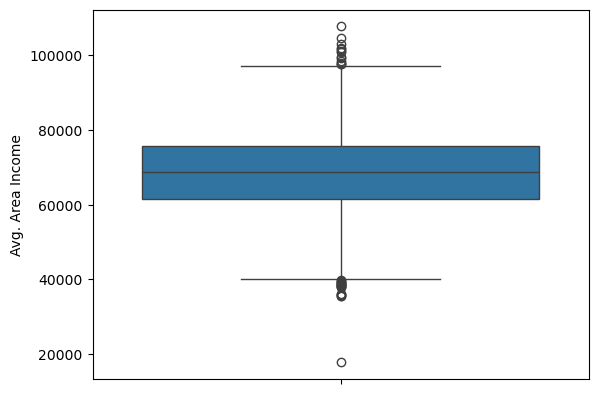

In [9]:
# Outlier

sns.boxplot(y ='Avg. Area Income', data=USAHousing)

<Axes: ylabel='Avg. Area House Age'>

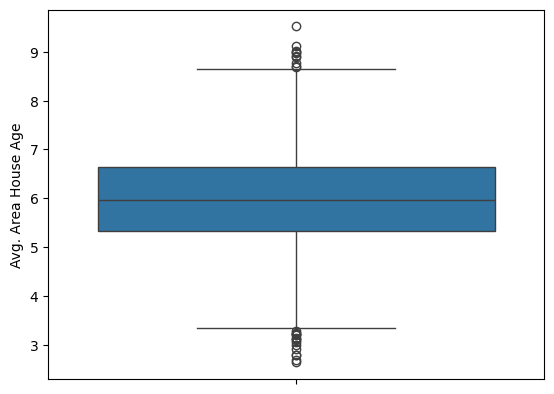

In [10]:
sns.boxplot(y ='Avg. Area House Age', data=USAHousing)

<Axes: ylabel='Avg. Area Number of Rooms'>

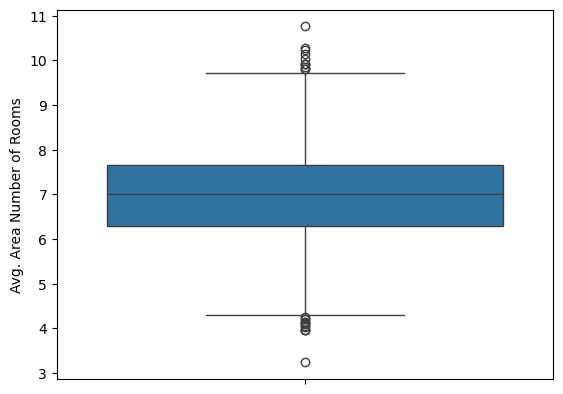

In [11]:
sns.boxplot(y ='Avg. Area Number of Rooms', data=USAHousing)

<Axes: ylabel='Avg. Area Number of Bedrooms'>

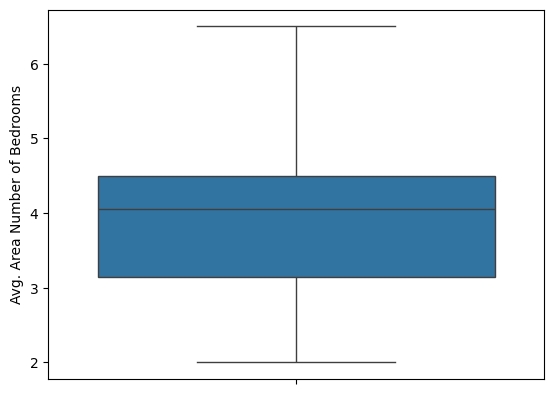

In [12]:
sns.boxplot(y ='Avg. Area Number of Bedrooms', data=USAHousing)

<Axes: ylabel='Area Population'>

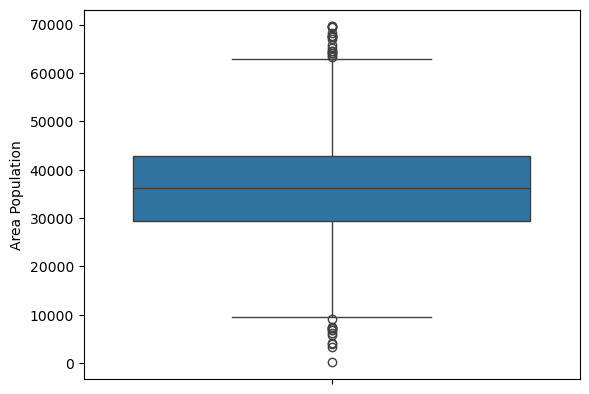

In [13]:
sns.boxplot(y ='Area Population', data=USAHousing)

In [14]:
Q1 = USAHousing.quantile(0.25)
Q3 = USAHousing.quantile(0.75)
IQR = Q3 - Q1
pos_outlier = Q3 + 1.5 * IQR
neg_outlier = Q1 - 1.5 * IQR

In [15]:
USAHousing = USAHousing[~((USAHousing < (Q1-1.5*IQR)) | (USAHousing > (Q3 + 1.5 * IQR))).any(axis=1)]

/var/folders/63/2hlbr3ld7x75vf6pw5j1rd780000gn/T/ipykernel_26078/481561776.py:1: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  USAHousing = USAHousing[~((USAHousing < (Q1-1.5*IQR)) | (USAHousing > (Q3 + 1.5 * IQR))).any(axis=1)]


<Axes: ylabel='Avg. Area Income'>

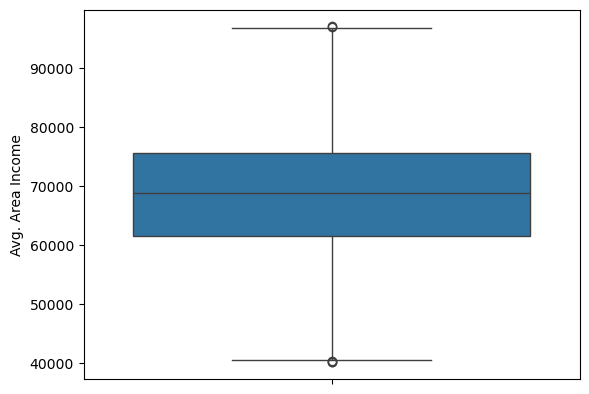

In [16]:
sns.boxplot(y ='Avg. Area Income', data=USAHousing)

<Axes: ylabel='Avg. Area House Age'>

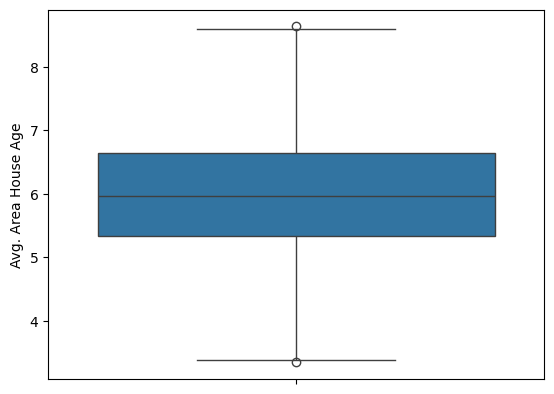

In [17]:
sns.boxplot(y ='Avg. Area House Age', data=USAHousing)

<Axes: ylabel='Area Population'>

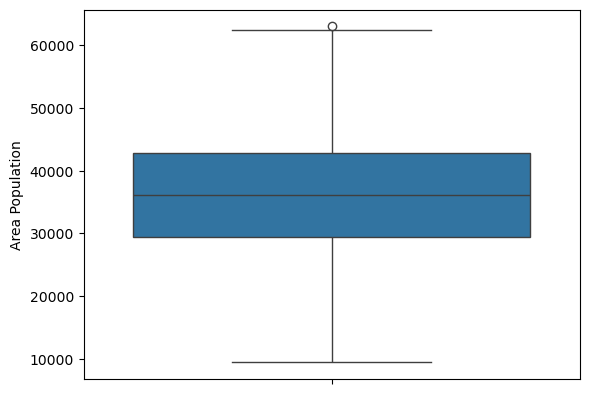

In [18]:
sns.boxplot(y ='Area Population', data=USAHousing)

In [19]:
# 3) Encoding concept : 1) Label encoder 2) one hot encoder 3 ) dummy variable
USAHousing.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


In [20]:
USAHousing.shape

(4865, 7)

In [21]:
# Address is non-significant variable, hence dropping this 

USAHousing = USAHousing.iloc[:,0:6]

In [22]:
USAHousing.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05


In [23]:
# pre-processing part 4 
# first I'm doing EDA (Exploratory Data Analysis)

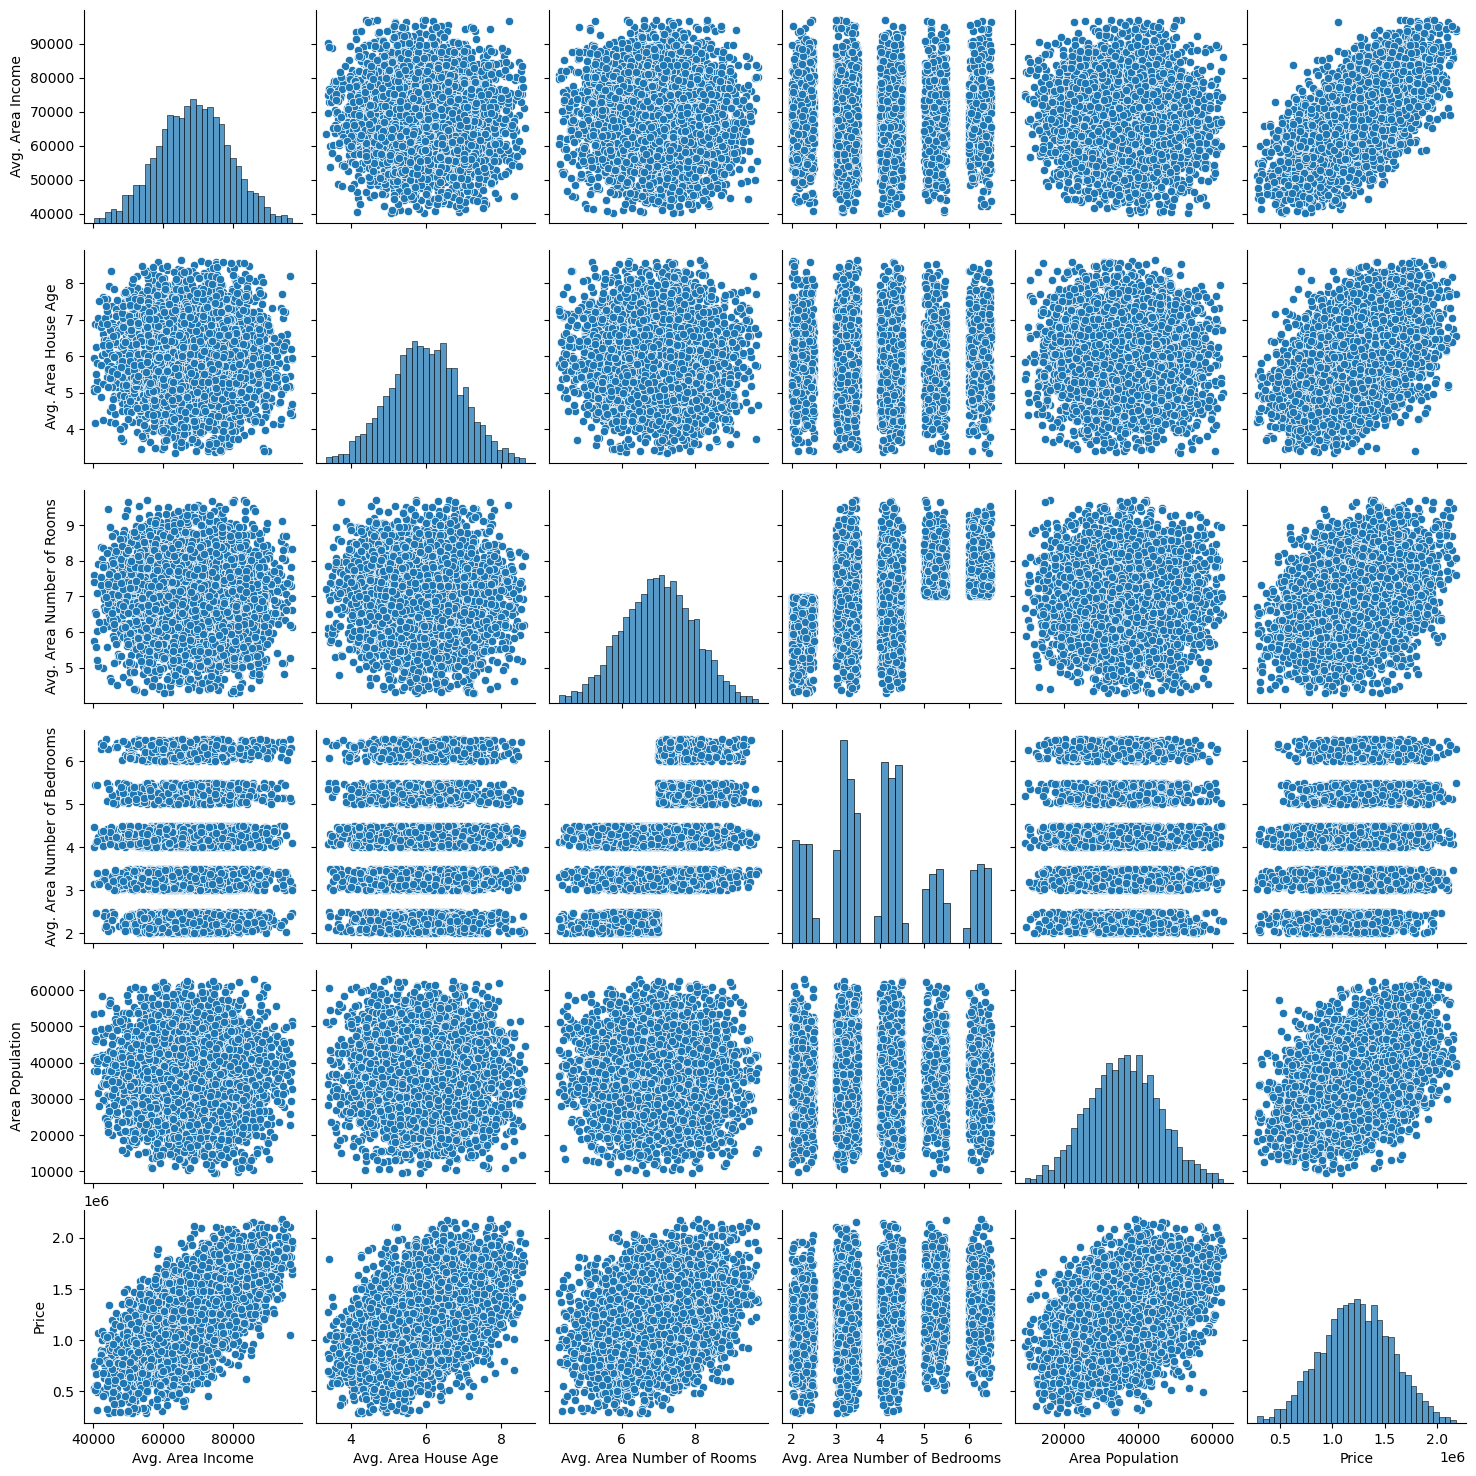

In [24]:
# Multivariates Analysis
sns.pairplot(USAHousing)

/var/folders/63/2hlbr3ld7x75vf6pw5j1rd780000gn/T/ipykernel_26078/2634421510.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(USAHousing['Price'])


<Axes: xlabel='Price', ylabel='Density'>

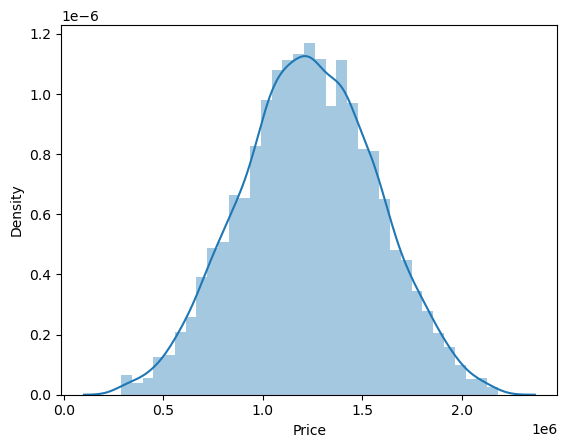

In [25]:
# Uni-variates
sns.distplot(USAHousing['Price'])

In [26]:
USAHousing.corr()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
Avg. Area Income,1.000000,-0.021102,-0.021113,0.012875,-0.014097,0.632031
Avg. Area House Age,-0.021102,1.000000,-0.016919,0.001177,-0.024151,0.441675
Avg. Area Number of Rooms,-0.021113,-0.016919,1.000000,0.466596,-0.000244,0.329630
Avg. Area Number of Bedrooms,0.012875,0.001177,0.466596,1.000000,-0.023172,0.168606
Area Population,-0.014097,-0.024151,-0.000244,-0.023172,1.000000,0.406027
Price,0.632031,0.441675,0.329630,0.168606,0.406027,1.000000


<Axes: >

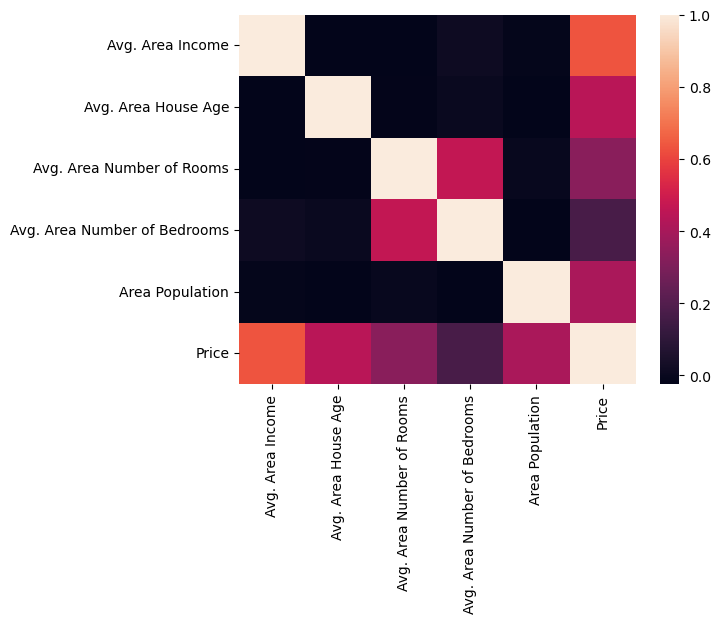

In [27]:
# Bi-Variate
sns.heatmap(USAHousing.corr())

<Axes: >

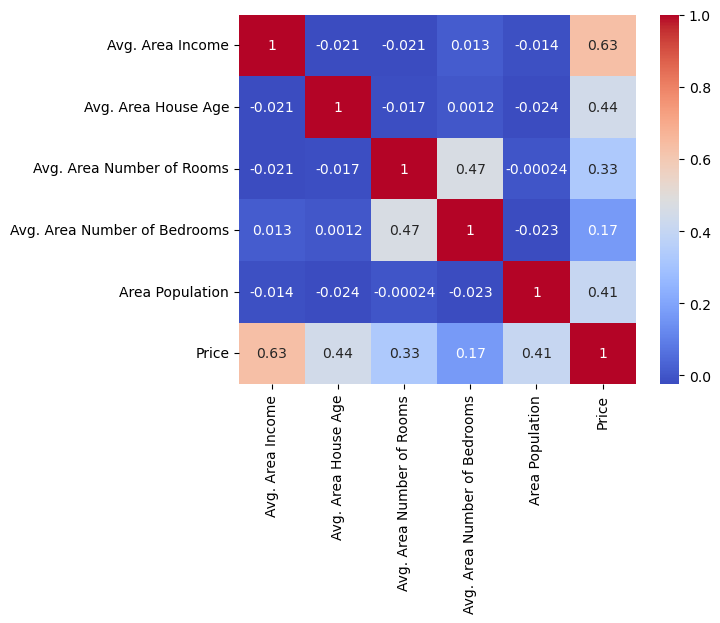

In [28]:
sns.heatmap(USAHousing.corr(), annot=True, cmap = 'coolwarm')

In [29]:
USAHousing.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price'],
      dtype='object')

In [30]:
# splitting the data into independent variable and dependent variable

x = USAHousing[['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population']]

y = USAHousing['Price']

In [31]:
x.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population
0,79545.458574,5.682861,7.009188,4.09,23086.800503
1,79248.642455,6.002900,6.730821,3.09,40173.072174
2,61287.067179,5.865890,8.512727,5.13,36882.159400
3,63345.240046,7.188236,5.586729,3.26,34310.242831
4,59982.197226,5.040555,7.839388,4.23,26354.109472


In [32]:
y.head()

0    1.059034e+06
1    1.505891e+06
2    1.058988e+06
3    1.260617e+06
4    6.309435e+05
Name: Price, dtype: float64

In [33]:
# pre-processing part 4 - feature scaling (Independent variable)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

In [34]:
x_scaled

array([[ 1.06071779, -0.30363229,  0.02290907,  0.0859644 , -1.35240284],
       [ 1.03191461,  0.02775903, -0.25978767, -0.72371729,  0.4207993 ],
       [-0.7110857 , -0.11411114,  1.5498338 ,  0.92803335,  0.07927052],
       ...,
       [-0.50694938,  1.31970959, -2.2154799 , -1.50101171, -0.29599705],
       [-0.05953013, -0.45737203,  0.14574608,  1.17903467,  0.67532313],
       [-0.30123371,  0.0167887 , -0.1973158 ,  0.06977076,  1.07753698]])

In [35]:
pd.DataFrame(x_scaled)

,0,1,2,3,4
0,1.060718,-0.303632,0.022909,0.085964,-1.352403
1,1.031915,0.027759,-0.259788,-0.723717,0.420799
2,-0.711086,-0.114111,1.549834,0.928033,0.079271
3,-0.511360,1.255143,-1.421675,-0.586071,-0.187641
4,-0.837711,-0.968724,0.866021,0.199320,-1.013324
...,...,...,...,...,...
4860,-0.780870,1.920048,-0.862483,-0.424135,-1.378290
4861,0.958419,1.059334,-0.416242,0.029287,-1.089912
4862,-0.506949,1.319710,-2.215480,-1.501012,-0.295997
4863,-0.059530,-0.457372,0.145746,1.179035,0.675323


# VIF (Variance Inflation Factor)

In [36]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
variable = x_scaled

vif = pd.DataFrame()

vif['Variance Inflation Factor'] = [variance_inflation_factor(variable, i) for i in range(variable.shape[1])]
vif['Features'] = x.columns

In [37]:
vif
# there is no multicollinearity in this dataset. we can cosider VIF only when the value is greater then 5 

,Variance Inflation Factor,Features
0,1.001776,Avg. Area Income
1,1.001451,Avg. Area House Age
2,1.280194,Avg. Area Number of Rooms
3,1.280126,Avg. Area Number of Bedrooms
4,1.001448,Area Population


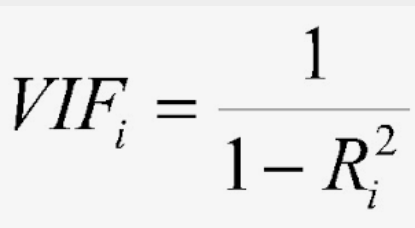

In [38]:
# x is my independent variable - input
# y is my dependent variable - output

In [39]:
# Split the data into training and test

from sklearn.model_selection import train_test_split  # 3.1/2/3...8
#from sklearn.cross_validation import train_test_split  # 2.7 

x_train, x_test, y_train, y_test = train_test_split(x,y, train_size = 0.75, random_state=101)

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(3648, 5)
(1217, 5)
(3648,)
(1217,)


In [40]:
x_train.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population
1586,77187.848353,6.269795,6.774005,4.00,35106.546145
2669,61426.001335,4.143033,6.484096,3.32,45701.332850
2215,75869.654819,5.844481,5.793123,2.24,27606.007209
832,80951.283388,5.450699,6.323822,4.14,38990.807121
3538,53599.800859,6.553829,8.937600,3.41,28163.140587


In [41]:
x_test.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population
3409,79510.051991,6.403359,5.431044,3.08,32647.783285
583,70673.842544,6.204023,5.877785,3.06,58256.114762
3019,61536.557216,6.670543,6.994016,2.15,29346.720905
3808,78792.355268,5.735399,6.559515,4.01,29578.221202
1543,60805.103305,4.170949,7.347941,3.16,31185.883332


In [42]:
y_train.head()

1586    1.646663e+06
2669    8.919811e+05
2215    1.002691e+06
832     1.524116e+06
3538    9.556895e+05
Name: Price, dtype: float64

In [43]:
y_test.head()

3409    1.262553e+06
583     1.412243e+06
3019    1.151342e+06
3808    1.341450e+06
1543    6.713439e+05
Name: Price, dtype: float64

# Creating Linear Regression Model with training dataset

In [44]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(x_train, y_train)

LinearRegression()

In [45]:
print(lm.intercept_)

-2620366.856025505


In [46]:
print(lm.coef_)

[2.14903770e+01 1.65315951e+05 1.19417255e+05 2.66187472e+03
 1.50894731e+01]


In [47]:
#Y = B0 + B1*X1 + B2*X2 + B3*X3 + B4 *X4 + B5 * X4
#Y = -2620366.856025503 + 2.14903770e+01 *Avg. Area Income + 1.65315951e+05 * Avg. Area House Age + 
#        1.19417255e+05 *Avg. Area Number of Rooms + 2.66187472e+03*Avg. Area Number of Bedrooms +
 #       1.50894731e+01*Area Population

In [48]:
#coef_df = pd.DataFrame(lm.coef_, x.columns, columns = ['Coefficient'])
#coef_df

In [49]:
x_test.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population
3409,79510.051991,6.403359,5.431044,3.08,32647.783285
583,70673.842544,6.204023,5.877785,3.06,58256.114762
3019,61536.557216,6.670543,6.994016,2.15,29346.720905
3808,78792.355268,5.735399,6.559515,4.01,29578.221202
1543,60805.103305,4.170949,7.347941,3.16,31185.883332


# Predict the model with test dataset

In [50]:
y_pred = lm.predict(x_test)
y_pred

array([1296308.27760357, 1513172.94235849, 1088579.86706802, ...,
       1428360.89350381,  761380.84135394,  992514.68882441])

In [51]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.9125707180361107

# Regression Model Evaluation by "OLS" Methods

In [52]:
from statsmodels.regression.linear_model import OLS
import statsmodels.regression.linear_model as smf

In [53]:
reg_model = smf.OLS(endog = y_train, exog = x_train).fit()

In [54]:
reg_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  Price   R-squared (uncentered):                   0.967
Model:                            OLS   Adj. R-squared (uncentered):              0.967
Method:                 Least Squares   F-statistic:                          2.140e+04
Date:                Sun, 31 Dec 2023   Prob (F-statistic):                        0.00
Time:                        19:20:28   Log-Likelihood:                         -50241.
No. Observations:                3648   AIC:                                  1.005e+05
Df Residuals:                    3643   BIC:                                  1.005e+05
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Avg. Area Income                10.1917      0.308     33.060      0.000       9.587      10.796
Avg. Area House Age           5.183e+04   3373.132     15.367      0.000    4.52e+04    5.84e+04
Avg. Area Number of Rooms     -1.14e+04   3746.057     -3.043      0.002   -1.87e+04   -4055.448
Avg. Area Number of Bedrooms  7681.3886   3514.480      2.186      0.029     790.845    1.46e+04
Area Population                  8.0078      0.377     21.231      0.000       7.268       8.747
==============================================================================
Omnibus:                       10.233   Durbin-Watson:                   1.953
Prob(Omnibus):                  0.006   Jarque-Bera (JB):                8.400
Skew:                          -0.031   Prob(JB):                       0.0150
Kurtosis:                       2.774   Cond. No.                     9.47e+04
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 9.47e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

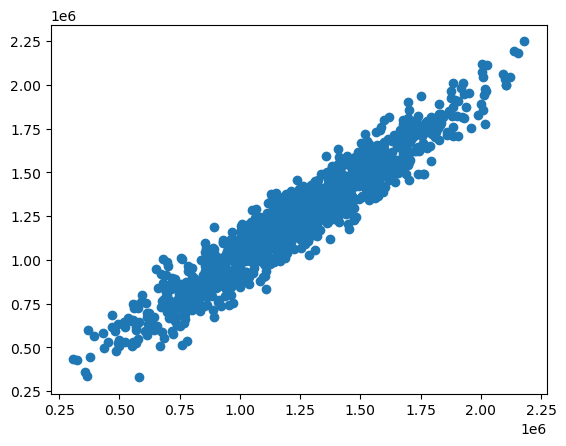

In [55]:
plt.scatter(y_test, y_pred)

/var/folders/63/2hlbr3ld7x75vf6pw5j1rd780000gn/T/ipykernel_26078/230764265.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot((y_test - y_pred), bins=50)


<Axes: xlabel='Price', ylabel='Density'>

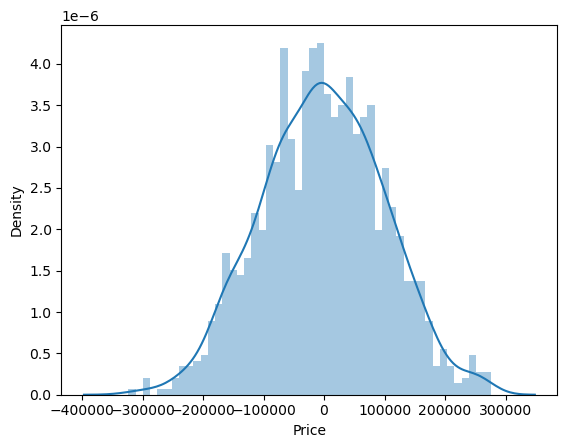

In [56]:
sns.distplot((y_test - y_pred), bins=50)

/var/folders/63/2hlbr3ld7x75vf6pw5j1rd780000gn/T/ipykernel_26078/3033717008.py:3: UserWarning: 

The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`.
Setting `bw_method=0.5`, but please see the docs for the new parameters
and update your code. This will become an error in seaborn v0.14.0.

  sns.kdeplot(np.array(delta), bw=0.5)


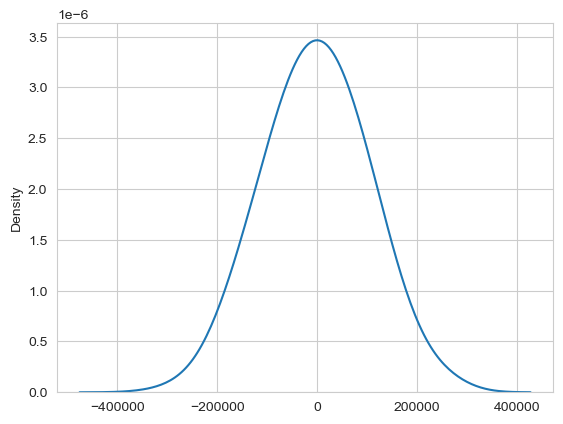

In [57]:
delta = y_test - y_pred
sns.set_style('whitegrid')
sns.kdeplot(np.array(delta), bw=0.5)
plt.show()

In [58]:
# Ask your stakeholder to give the answer

In [59]:
from sklearn import metrics

In [60]:
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))

MAE: 81315.10131344442


In [61]:
print('MAPE:', metrics.mean_absolute_error(y_test, y_pred)*100)

MAPE: 8131510.131344442


In [62]:
print('MSE:', metrics.mean_squared_error(y_test, y_pred))

MSE: 10223177913.742577


In [63]:
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

RMSE: 101109.73204268013


In [64]:
#Adj. R-squared (uncentered): 0.967

In [ ]:
# R_Square - 91.25%
# OLS method - Training accuracy (Adj R-Square) = 96.5%

# Conclude :model is absolutely right as there is neither overfit nor underfit problem